In [1]:
import numpy as np
import pandas as pd

In [2]:
advertising=pd.read_csv('tvmarketing.csv')

In [3]:
advertising.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [6]:
advertising.shape

(200, 2)

In [7]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [8]:
%matplotlib inline

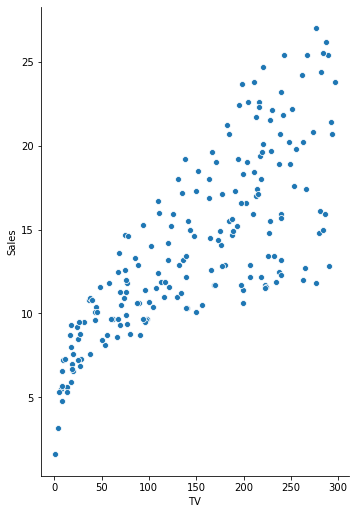

In [9]:
sns.pairplot(advertising, x_vars='TV', y_vars='Sales', height=7, aspect=0.7, kind='scatter')

In [10]:
x=advertising['TV']
x.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [11]:
y=advertising['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [13]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [14]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [15]:
x_train=x_train[:,np.newaxis]
x_test=x_test[:,np.newaxis]

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(140, 1)
(140,)
(60, 1)
(60,)


In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr=LinearRegression()

In [19]:
lr.fit(x_train, y_train)

LinearRegression()

In [22]:
print(lr.intercept_)
print(lr.coef_)

6.989665857411679
[0.04649736]


In [23]:
y_pred=lr.predict(x_test)

In [24]:
type(y_pred)

numpy.ndarray

In [26]:
y_pred

array([ 7.35234526, 18.06533671, 13.27610876, 17.11214086, 18.22807747,
       16.60531965, 13.4620982 , 16.17754395, 17.05169429, 17.07029323,
       12.4391563 , 17.66080969,  9.60281742, 15.72186983, 11.04423554,
       11.36971705, 13.95032046, 14.90351632, 14.59198401, 12.23921766,
       16.97264878, 13.00642408, 16.07524976, 15.21969836, 15.58702749,
       17.23303399, 17.20978531, 10.49091697, 15.58702749, 12.71349072,
       10.1700852 , 10.19798361, 12.61584627, 15.74976825,  9.31453379,
       12.59259759, 11.50920913, 14.81982107, 17.33067844, 15.97295557,
       17.00519693, 15.15925179, 14.63848137, 17.14933874, 12.57864838,
       11.16047894,  7.77547122, 18.55820871, 10.27237939,  8.76586496,
       16.405381  , 14.95466341, 10.4816175 , 13.08546959, 16.78665935,
        9.05879832,  7.78942043,  8.17999824, 16.17754395, 10.9744895 ])

Text(0, 0.5, 'Sales')

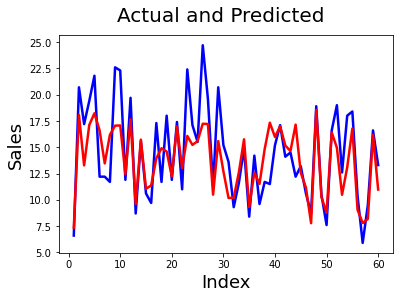

In [31]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c,y_pred, color='red', linewidth=2.5, linestyle='-')
fig.suptitle("Actual and Predicted", fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=18)

Text(0, 0.5, 'Sales')

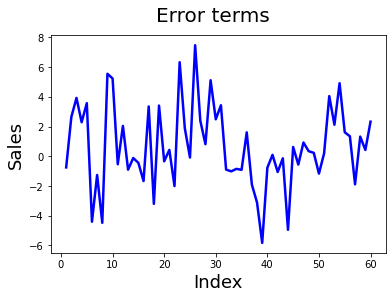

In [32]:
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=18)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
mse=mean_squared_error(y_test, y_pred)

In [35]:
mse

7.97579853285485

In [36]:
r_squared=r2_score(y_test, y_pred)
r_squared

0.5942987267783302

Text(0, 0.5, 'Predicted')

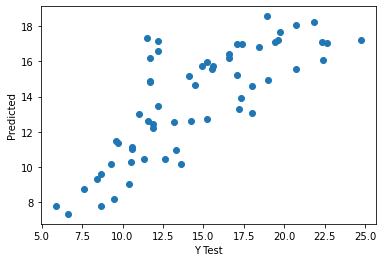

In [37]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted')